In [1]:
#Importing libraries for data pre-processing and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Data file.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
#This donot give the full detail about the data therefore using Heatmap to visualize the null values present in columns

<AxesSubplot:>

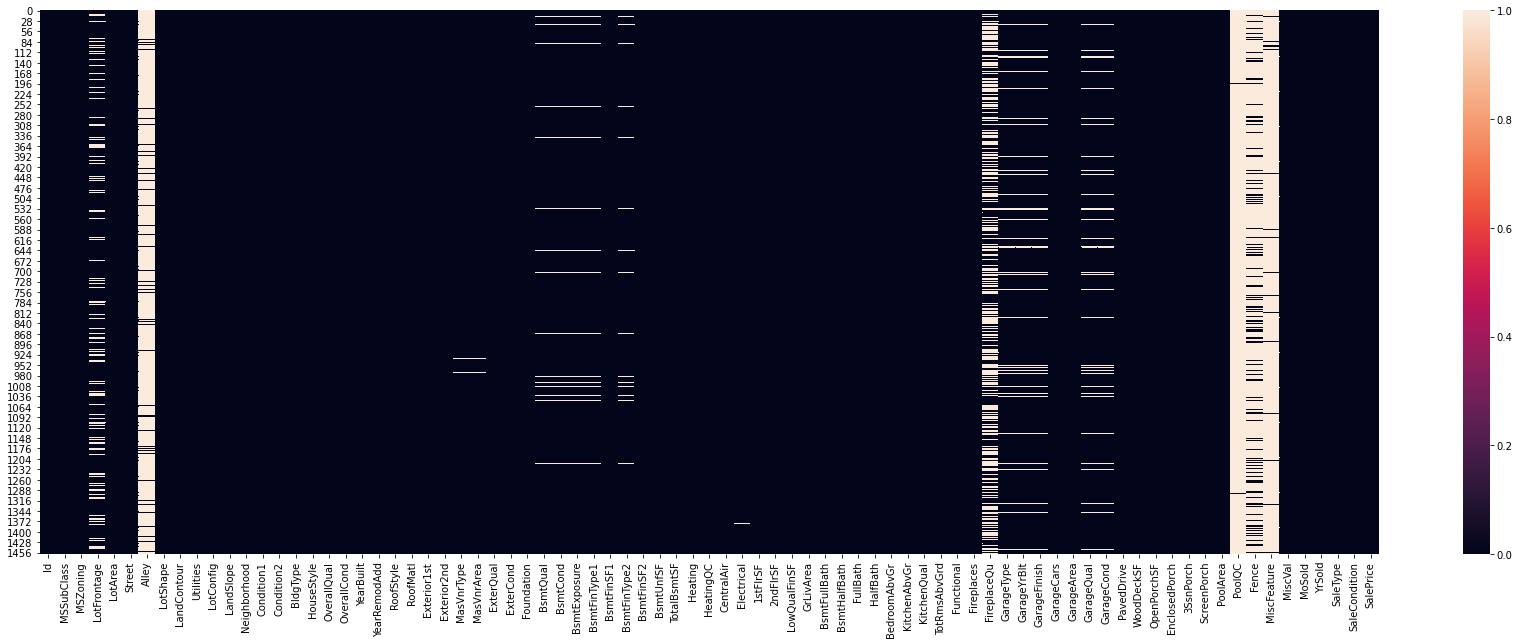

In [7]:
#Null values visuallization using Heatmap
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull())

# From the above heatmap we came to know the columns in which null values are present

In [8]:
# Now seeing the how much null value each column have 
Column_w_na=[]
for i in df.columns:
    if df[i].isnull().sum() != 0:
        print(i,df[i].isnull().sum())
        Column_w_na.append(i)

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [9]:
#Using (.info) to find the information about the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

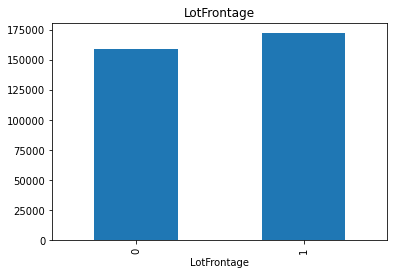

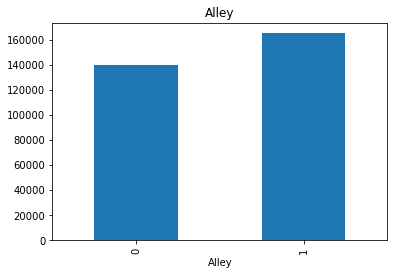

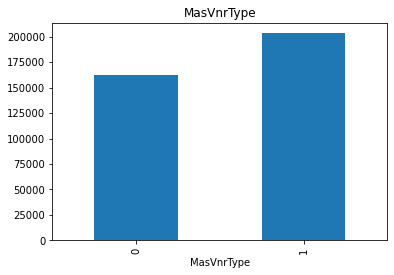

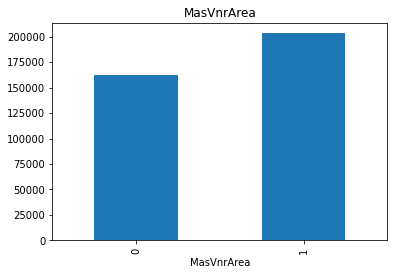

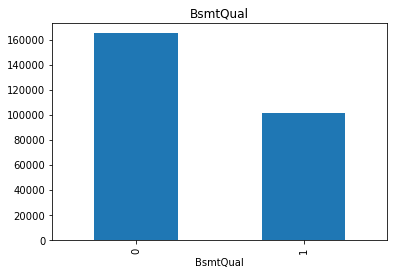

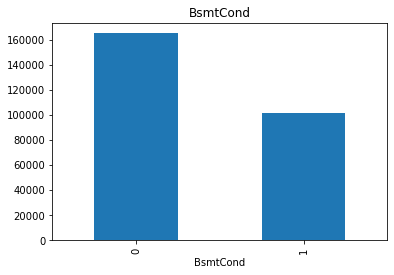

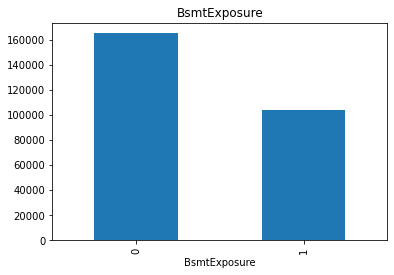

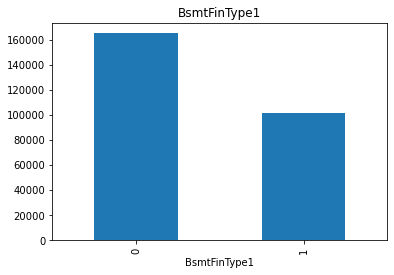

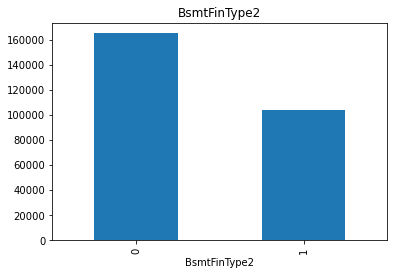

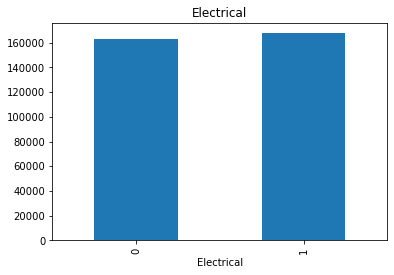

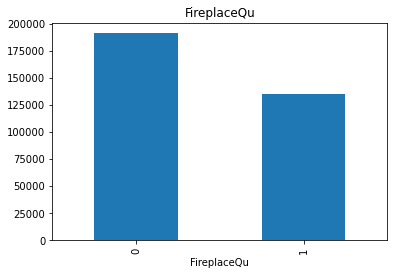

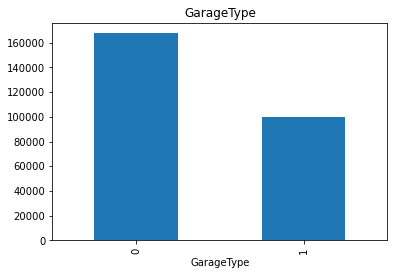

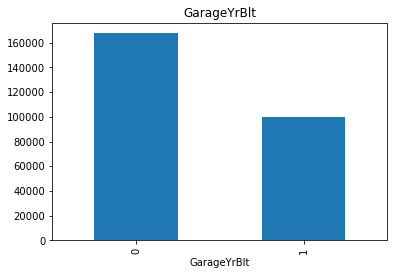

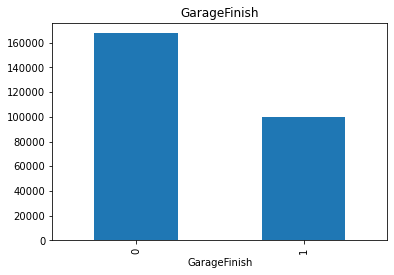

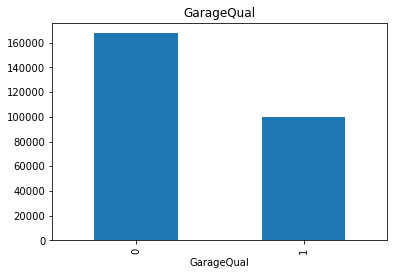

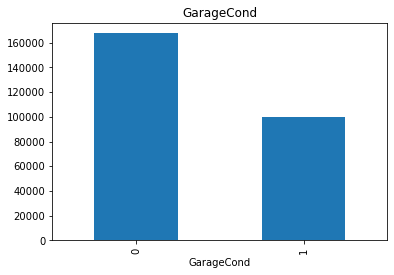

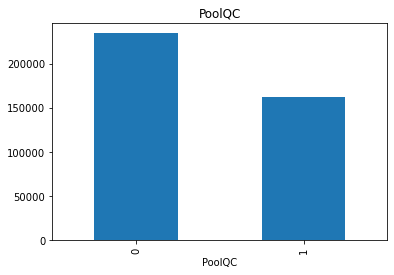

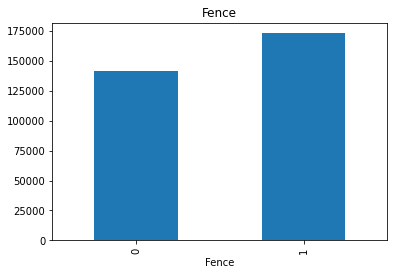

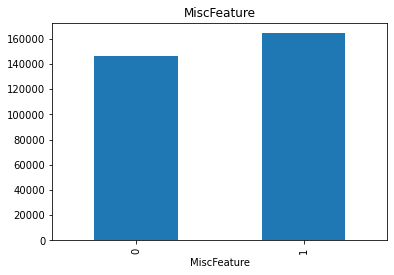

In [10]:
#Seeing how each column consisting of a null values is affecting a sale price of a house
for col in Column_w_na:
    data=df.copy()
    #Converting null values as 1 other wise zero 
    data[col] = np.where(data[col].isnull(),1,0)
    #plotting graph to see the effect of a nan values presnet in each column on a sale price of a house 
    data.groupby(col)['SalePrice'].median().plot.bar()
    plt.title(col)
    plt.show()

Here we can see that almost all column with null values in it is contributing approximately 50% or more to the sale price.
Therefore we need to replace these values with some meaningfull data. 

In [11]:
#from df.info above we have seen that we have four year column in our dataset from here we can analyse that in which year the house was built and in which it was sold
year_column= [column for column in df.columns if 'Yr' in column or 'Year' in column]

year_column

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
for col in year_column:
    print(col," " ,df[col].unique())
    print(col ," ",df[col].value_counts())

YearBuilt   [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearBuilt   2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64
YearRemodAdd   [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977

Text(0.5, 1.0, 'Sale Price WRT Year Sold')

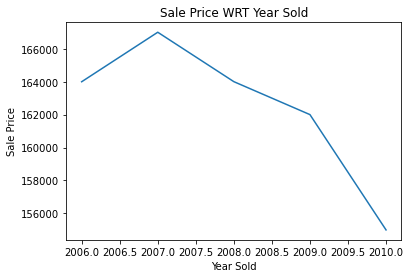

In [13]:
#Lets see is there any relation between year sold and the sales price
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Sale Price")
plt.title("Sale Price WRT Year Sold")

This shows that as the year increase the house price is decreasing but it cannot happen if we consider real life problems with it

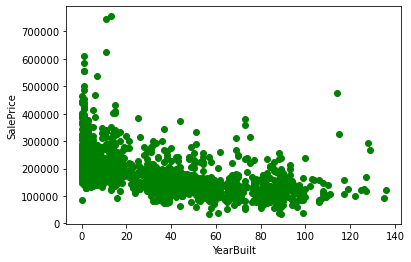

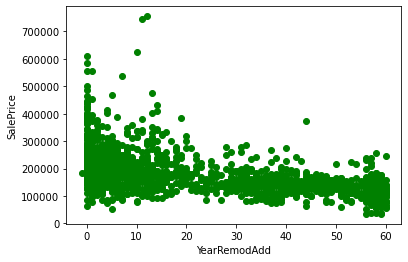

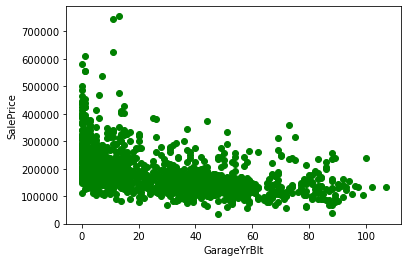

In [14]:
for column in year_column:
    if column!='YrSold':
        data=df.copy()
        data[column]=data['YrSold']-data[column]
        
        
        plt.scatter(data[column],data['SalePrice'],color='green')
        plt.xlabel(column)
        plt.ylabel('SalePrice')
        plt.show()

In [15]:
#Now finding how many discreet feature do we have in our dataset
descrete_col=[des_col for des_col in df if len(df[des_col].unique())<25 and des_col not in year_column]

descrete_col

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

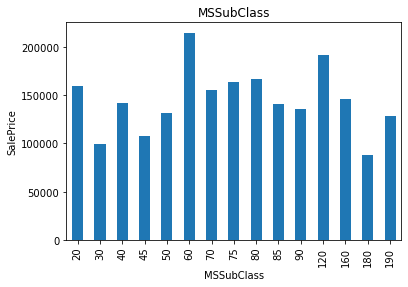

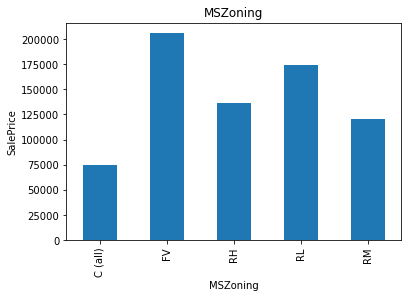

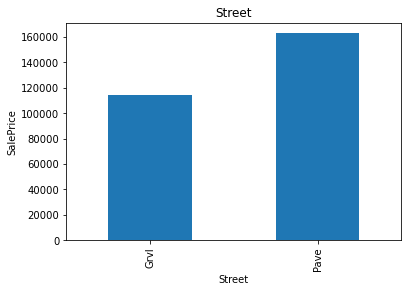

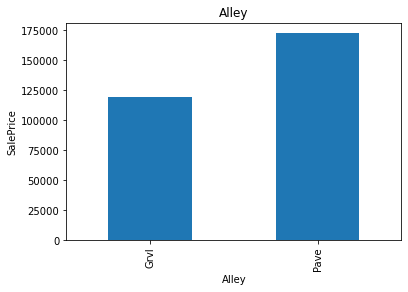

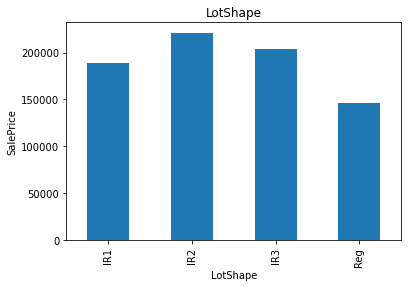

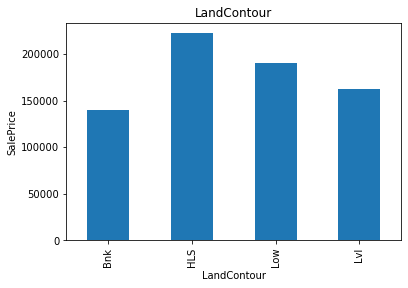

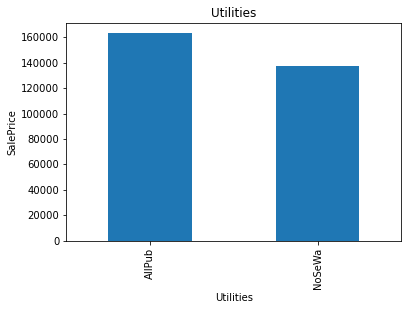

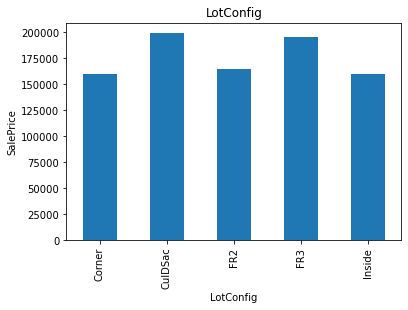

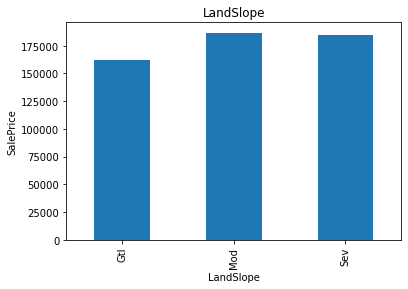

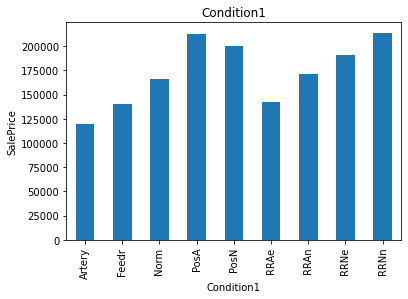

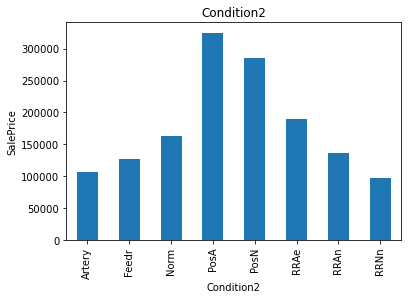

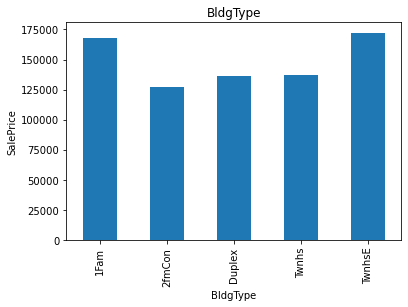

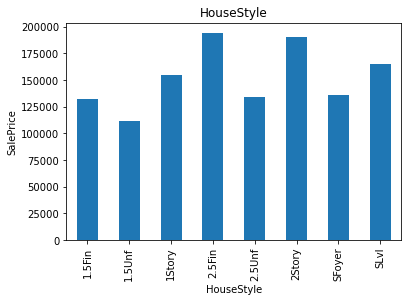

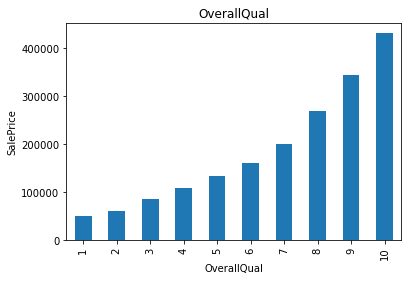

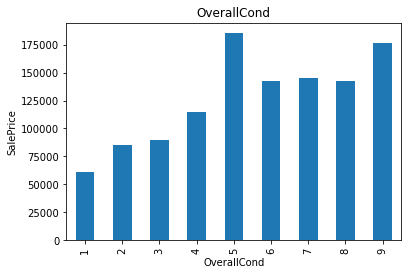

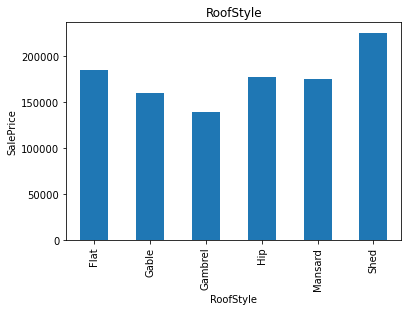

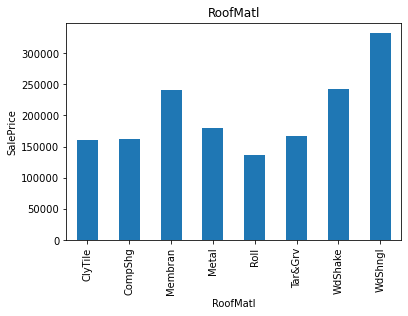

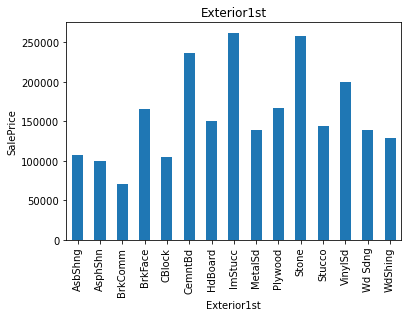

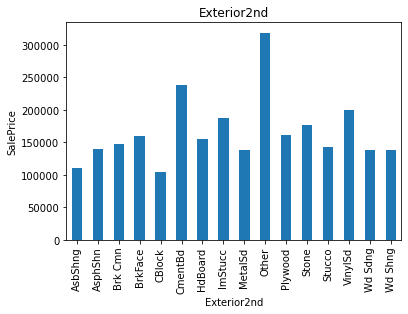

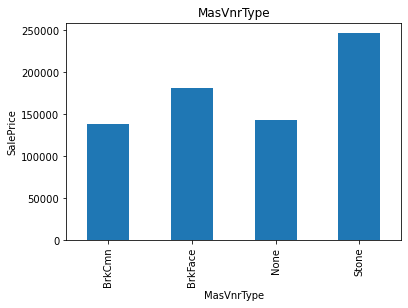

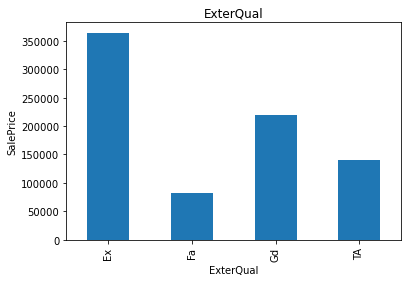

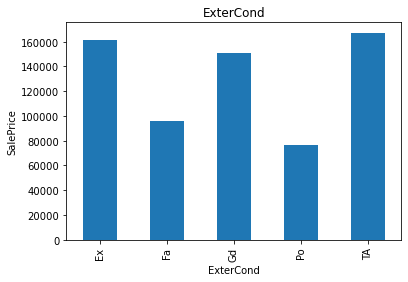

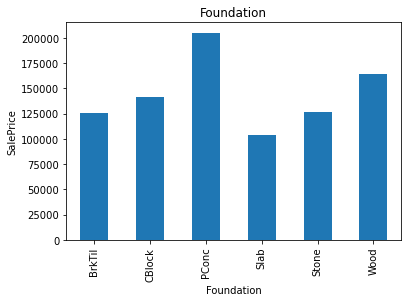

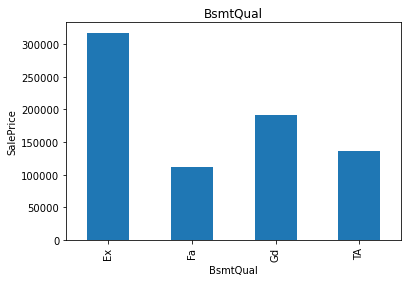

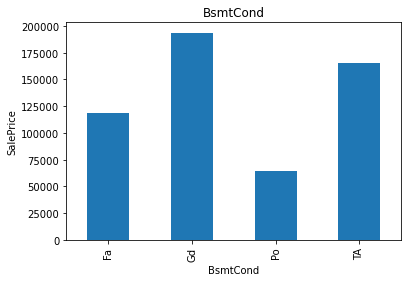

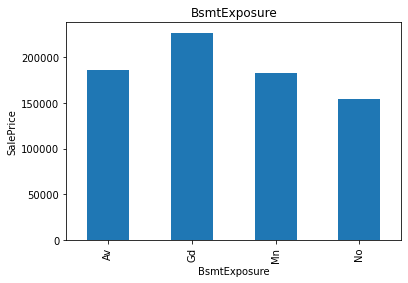

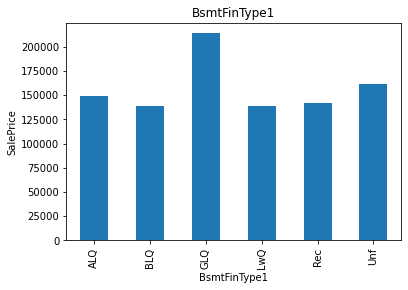

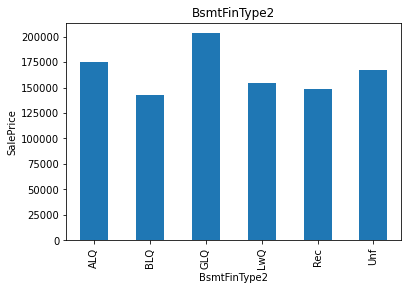

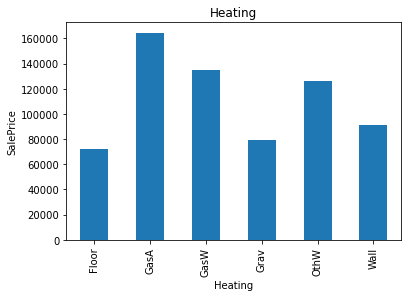

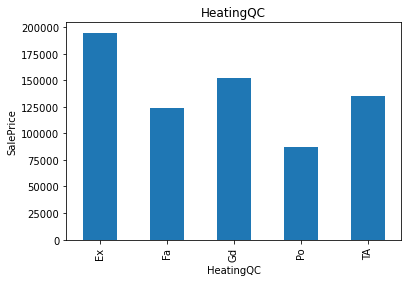

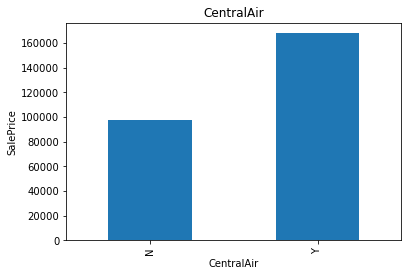

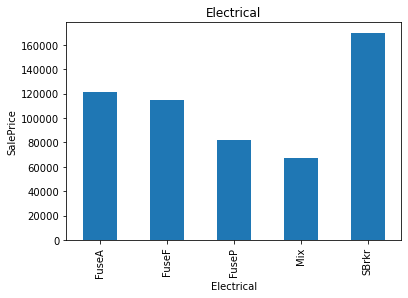

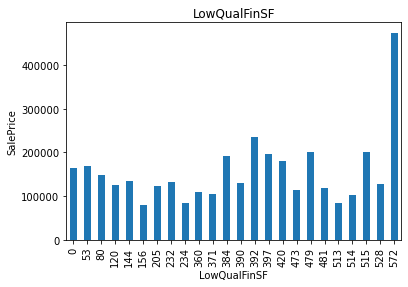

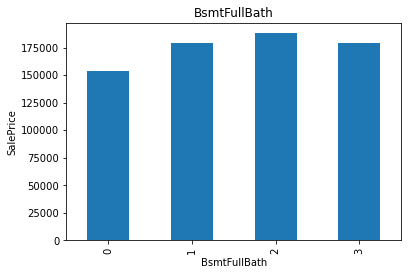

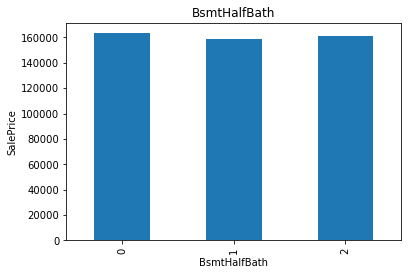

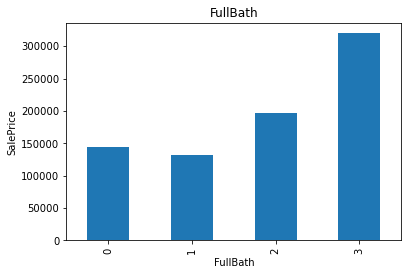

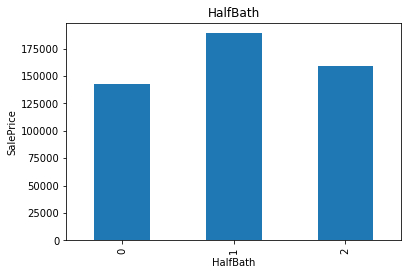

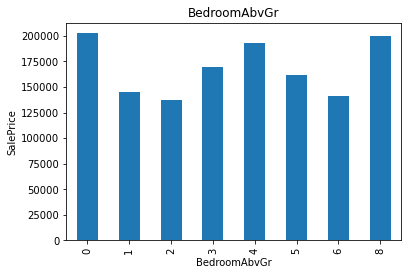

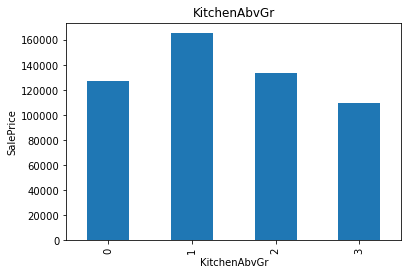

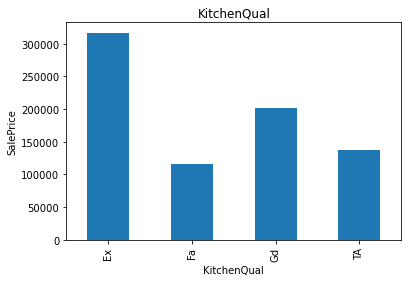

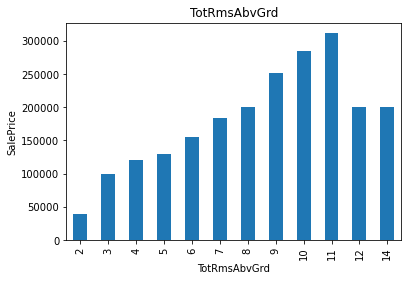

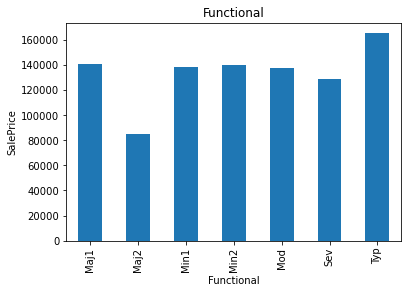

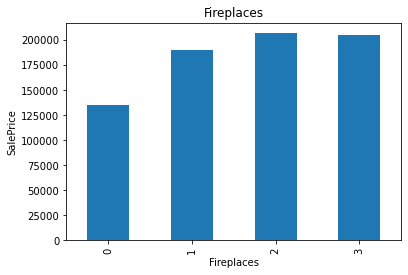

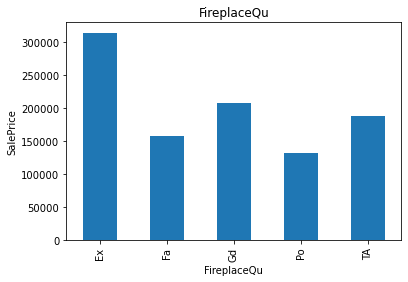

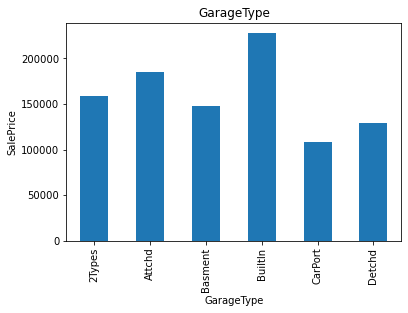

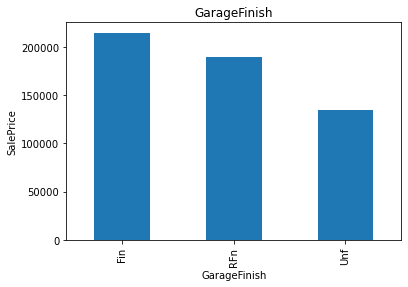

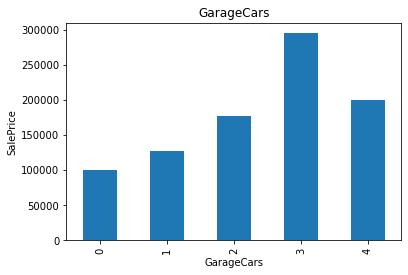

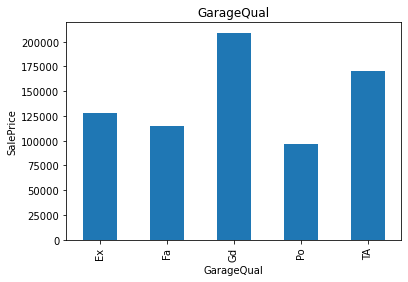

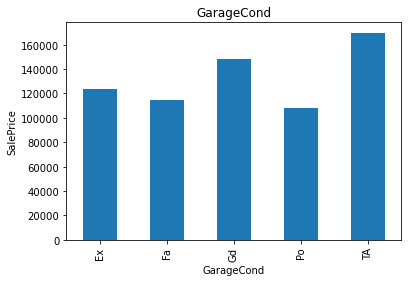

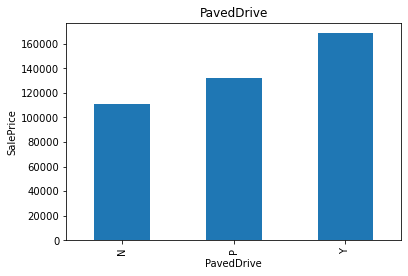

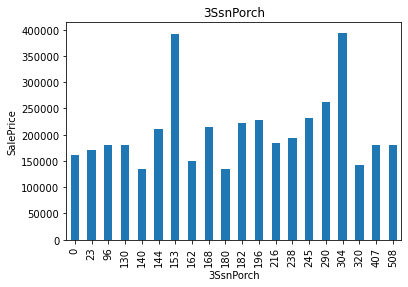

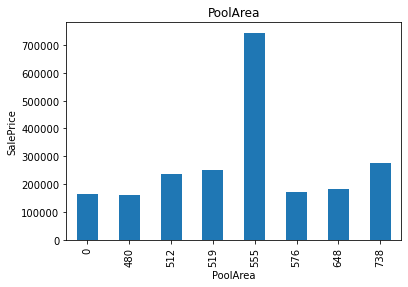

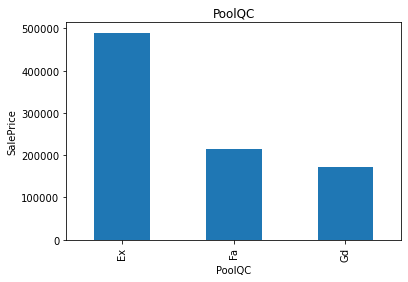

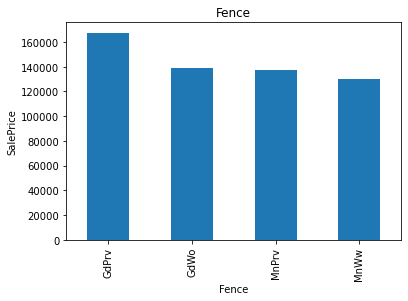

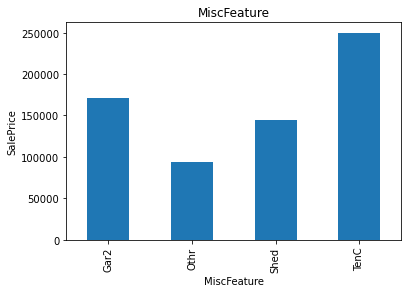

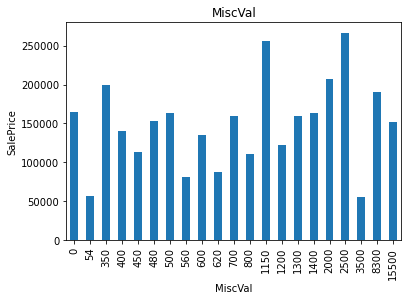

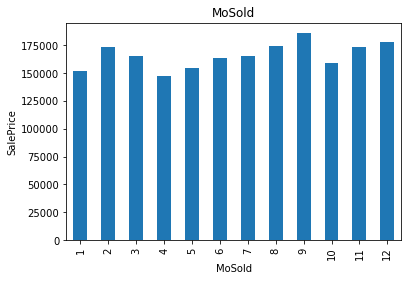

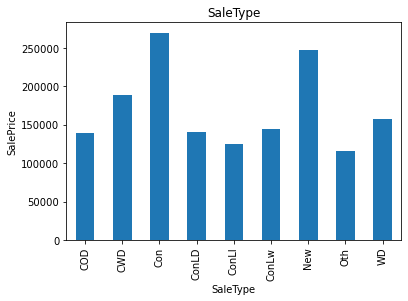

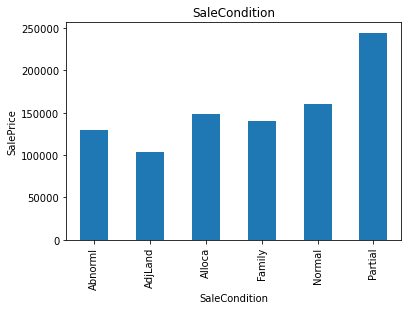

In [16]:
#Now seeing the effect of each vale in descrete columns on sale price of the house
for col in descrete_col: 
    data=df.copy()
    data.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()

#All the descretre column are having some kind of relation with the sales price

In [17]:
Continues_col=[con_col for con_col in df if con_col not in year_column+descrete_col+["Id"]]

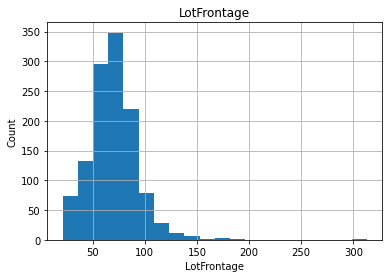

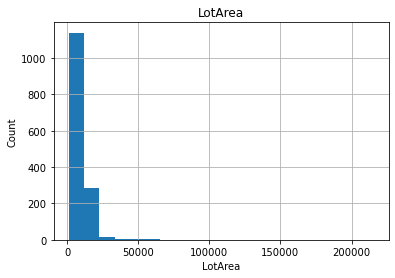

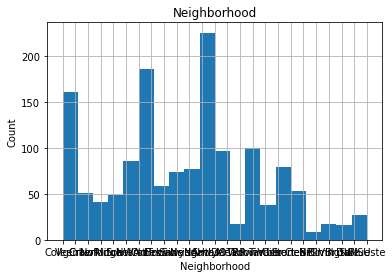

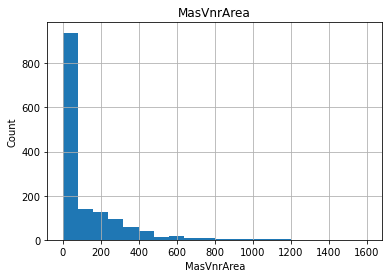

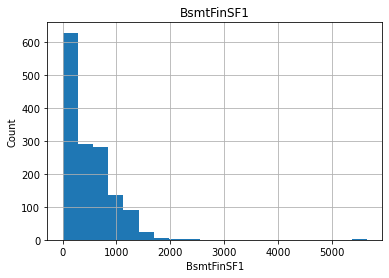

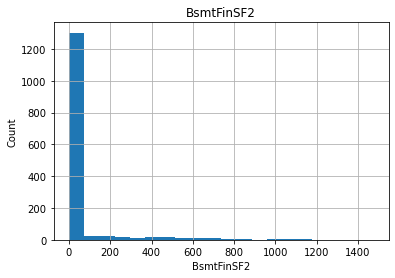

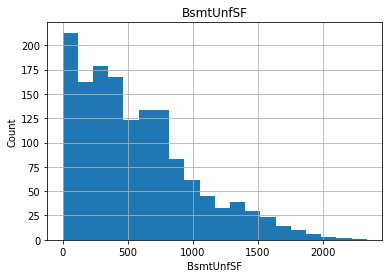

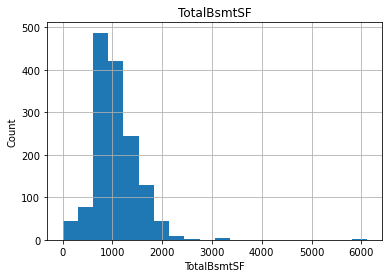

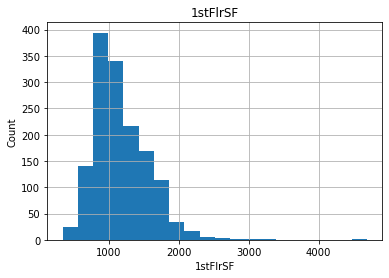

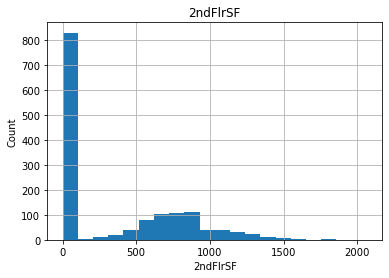

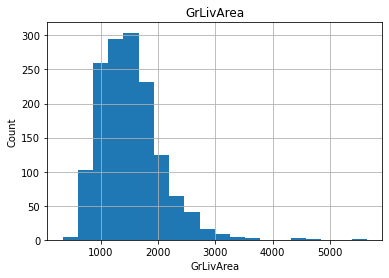

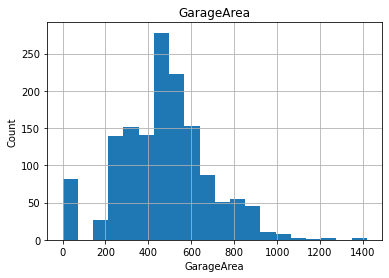

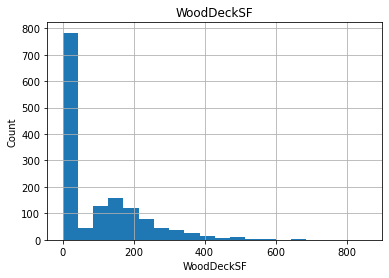

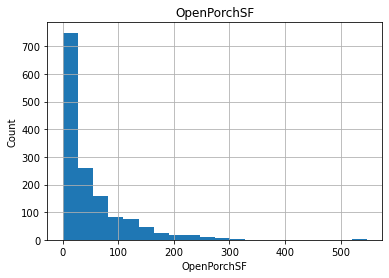

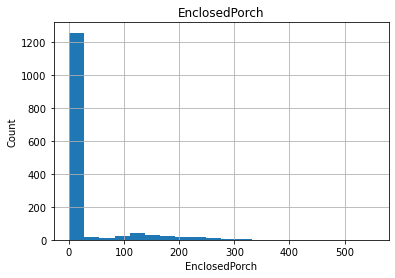

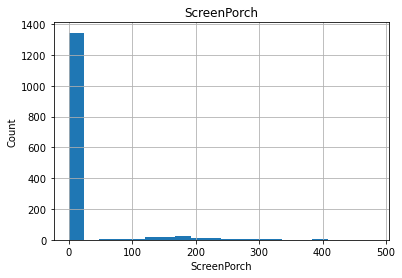

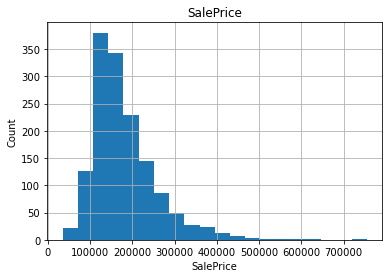

In [18]:
#Now seeing the effect of Continues columns on sale price of the house
for col in Continues_col: 
    data=df.copy()
    data[col].hist(bins=20)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(col)
    plt.show()

In [19]:
#here we can say that on sale price is normally distributed 

# proceeding column by column to treat the nan values in every column

In [20]:
#As LotFrontage is having float dtype replacing the nan values with the mean of the column
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [21]:
#Alley,PoolQC,Fence,MiscFeature column is having approxmately 50% or more than 50%  null values in it therefore dropping these column 
df.drop(['Alley','PoolQC','Fence','MiscFeature','Id'],axis=1,inplace=True)

In [22]:
#For MasVnr_Type finding the mode of the column and filling the null values with it
print(df['MasVnrType'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

None


In [23]:
#For MasVnr_Area finding the mean of the column and filling the null values with it
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [24]:
#For BsmtQual finding the mode of the column and filling the null values with it
print(df['BsmtQual'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])    

TA


In [25]:
#For BsmtCond finding the mode of the column and filling the null values with it
print(df['BsmtCond'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])   

TA


In [26]:
#For BsmtCond finding the mode of the column and filling the null values with it
print(df['BsmtExposure'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

No


In [27]:
#For BsmtCond finding the mode of the column and filling the null values with it
print(df['BsmtFinType1'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])   

Unf


In [28]:
#For BsmtCond finding the mode of the column and filling the null values with it
print(df['BsmtFinType2'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])  

Unf


In [29]:
#For Electrical finding the mode of the column and filling the null values with it
print(df['Electrical'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])   

SBrkr


In [30]:
#For Electrical finding the mode of the column and filling the null values with it
print(df['FireplaceQu'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])   

Gd


In [31]:
#For Electrical finding the mode of the column and filling the null values with it
print(df['GarageType'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0]) 

Attchd


In [32]:
#As LotFrontage is having float dtype replacing the nan values with the mean of the column
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [33]:
#For Electrical finding the mode of the column and filling the null values with it
print(df['GarageFinish'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])   

Unf


In [34]:
#For Electrical finding the mode of the column and filling the null values with it
print(df['GarageQual'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])    

TA


In [35]:
#For Electrical finding the mode of the column and filling the null values with it
print(df['GarageCond'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])   

TA


<AxesSubplot:>

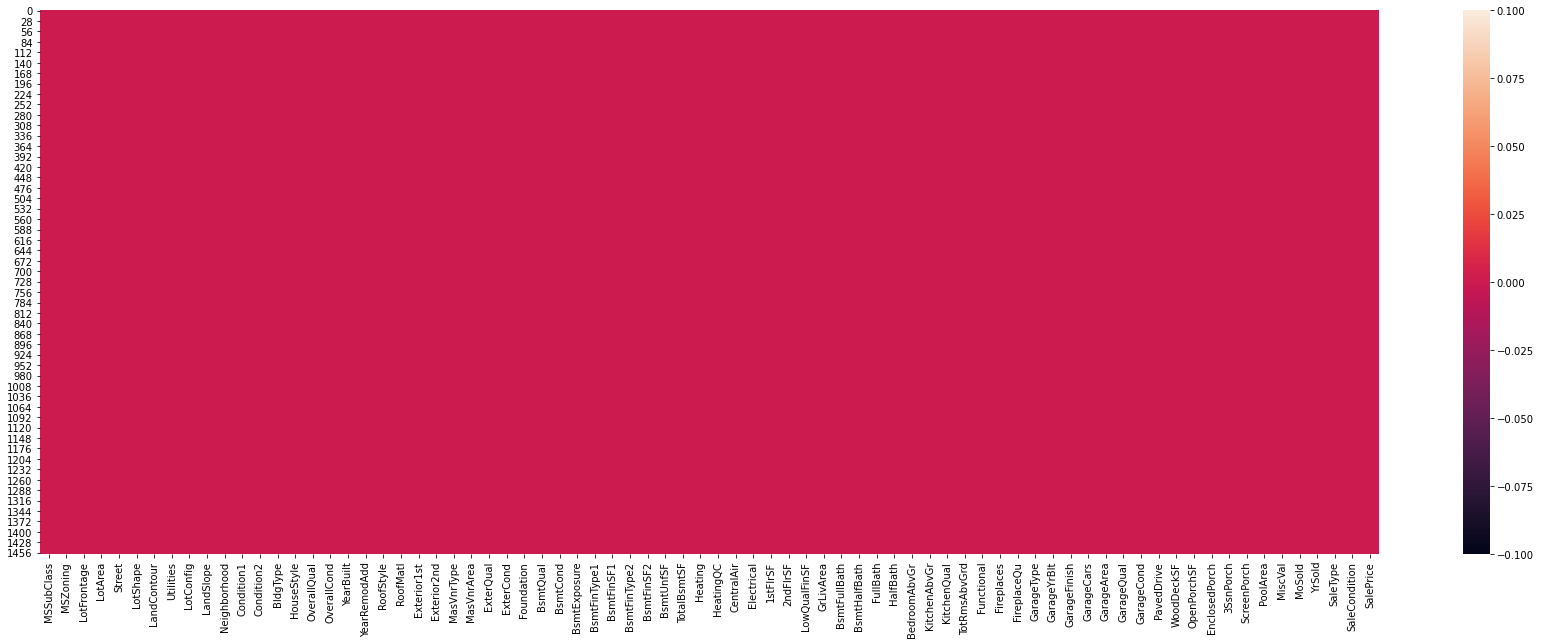

In [36]:
#Null values visuallization using Heatmap
plt.figure(figsize=(30,10))
sns.heatmap(df.isnull())

In [37]:
#as we have removed some columns so the columns in descrete column variable above will differ again colecting fresh set of discrete column
var_mod = df.select_dtypes(include='object').columns

In [38]:
#Using label encoder to change the  categorical column value into vector
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in var_mod:
    df[i]=lb.fit_transform(df[i])

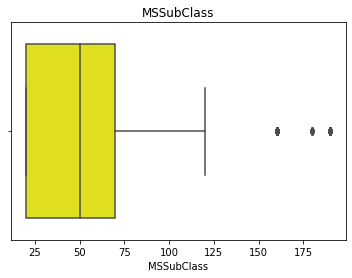

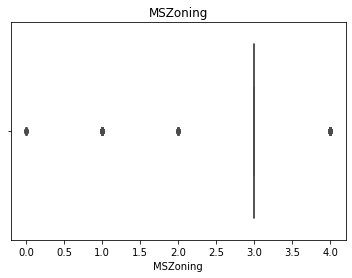

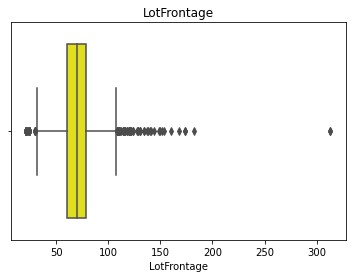

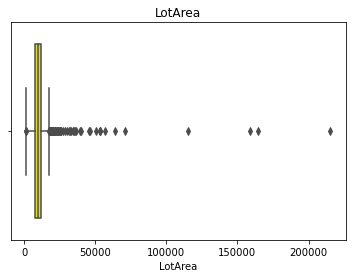

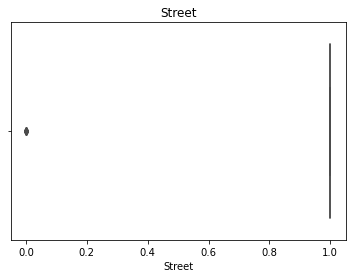

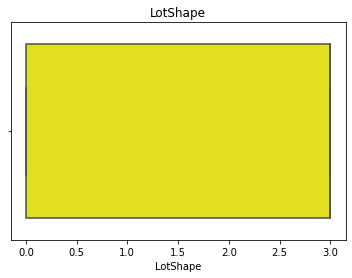

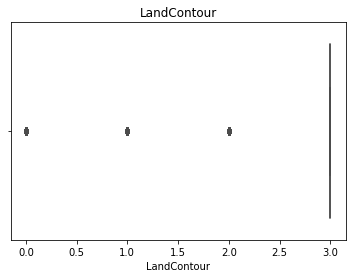

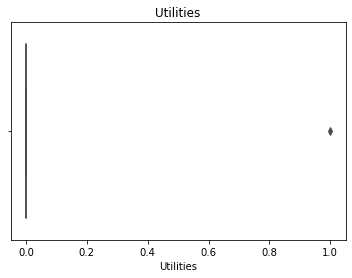

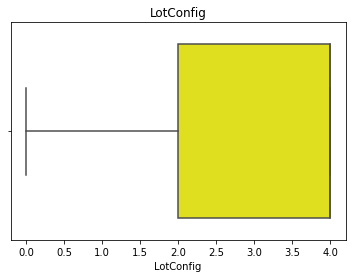

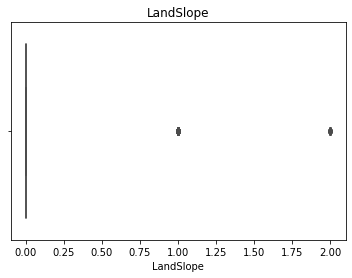

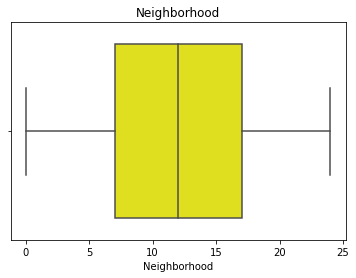

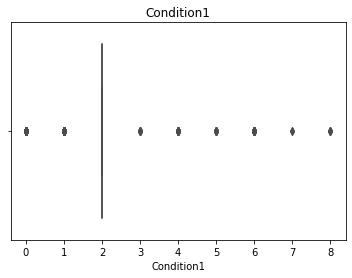

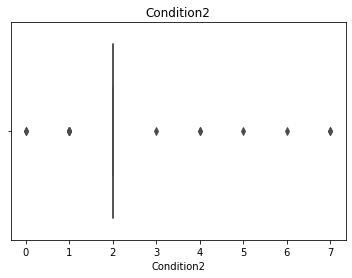

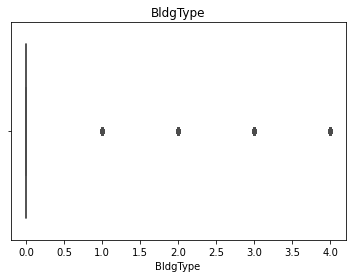

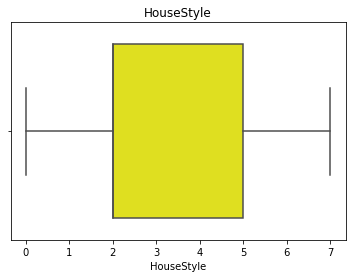

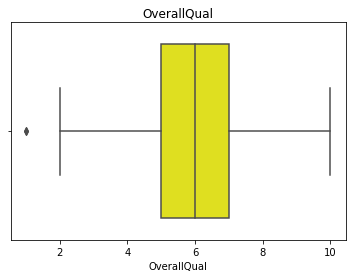

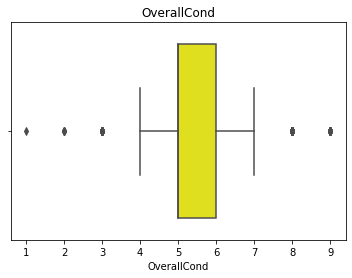

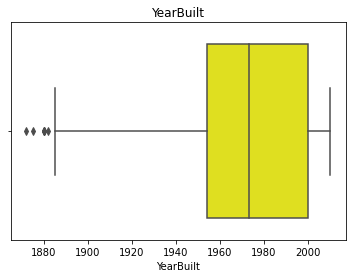

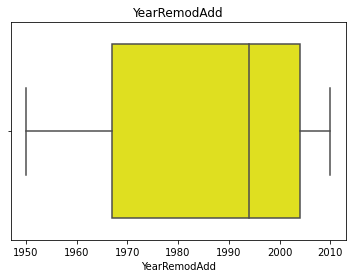

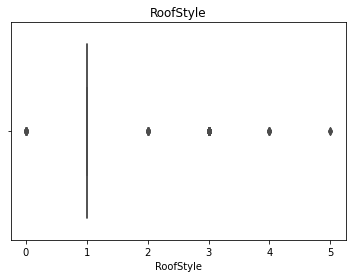

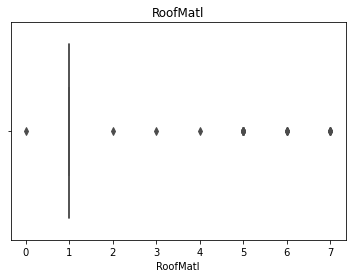

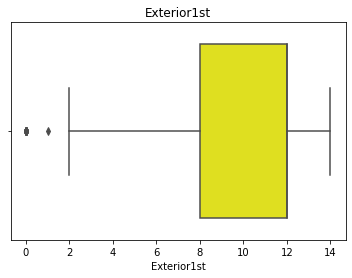

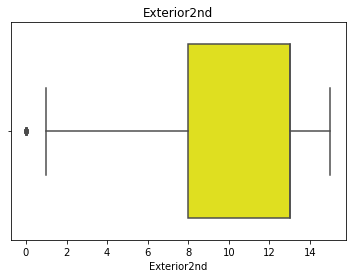

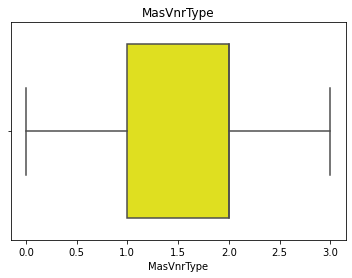

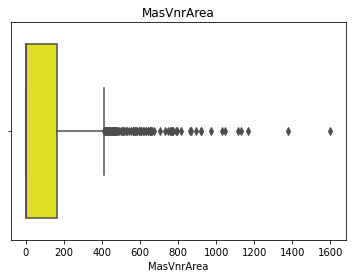

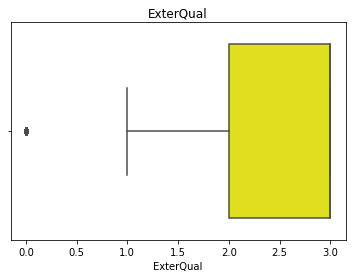

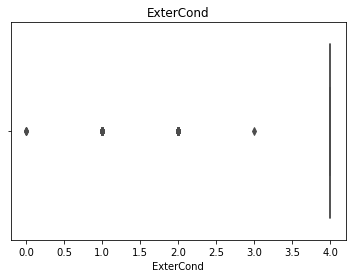

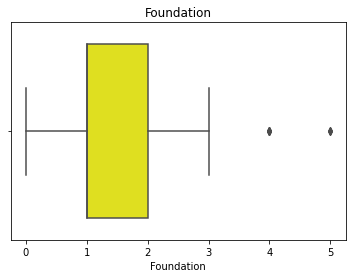

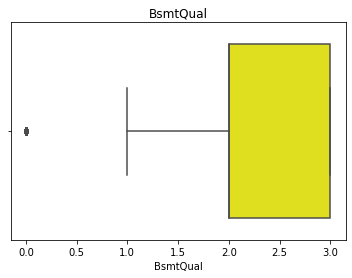

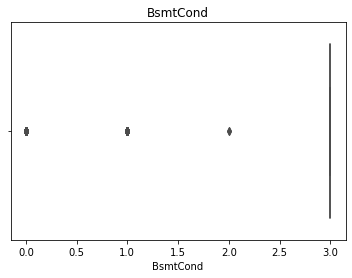

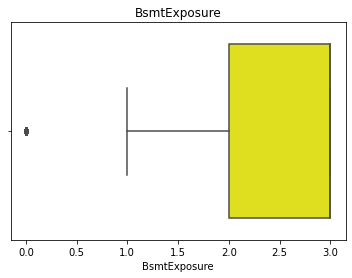

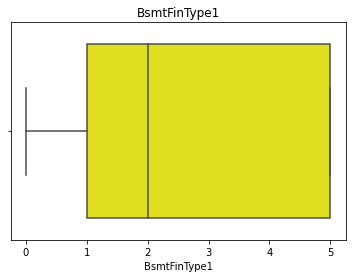

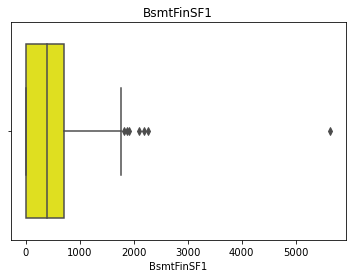

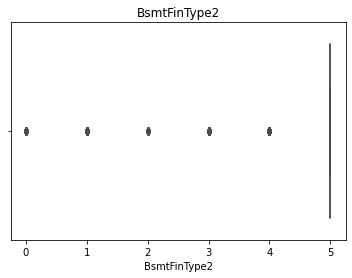

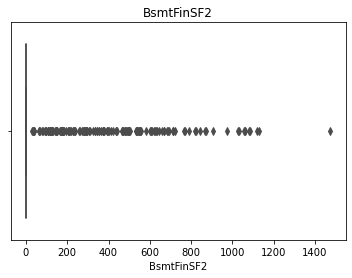

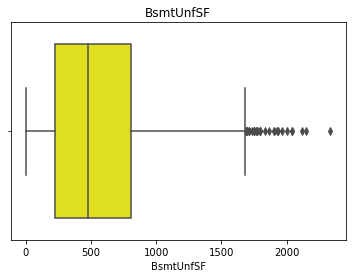

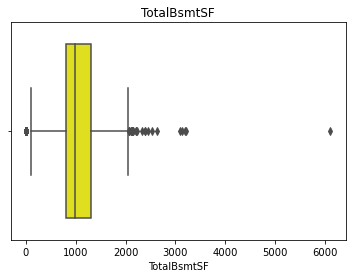

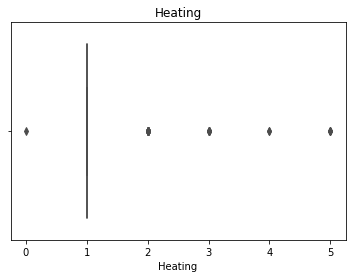

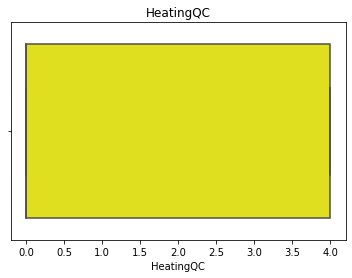

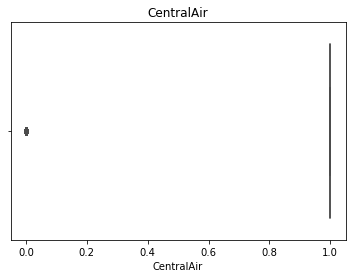

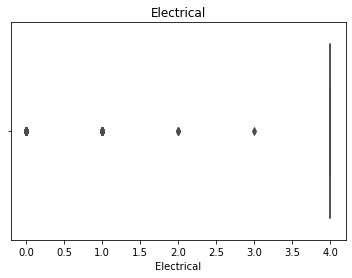

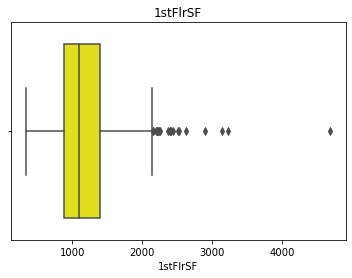

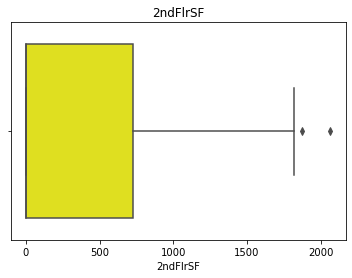

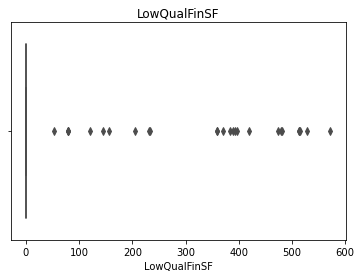

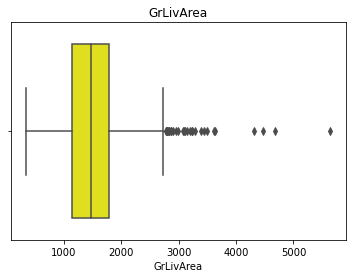

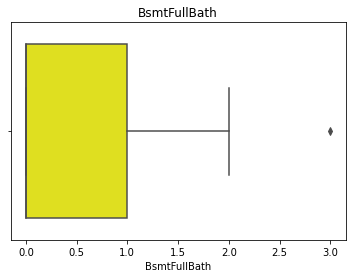

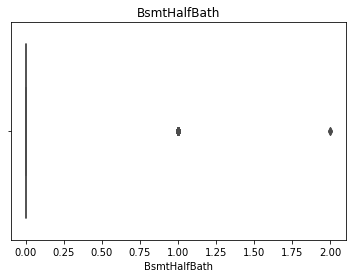

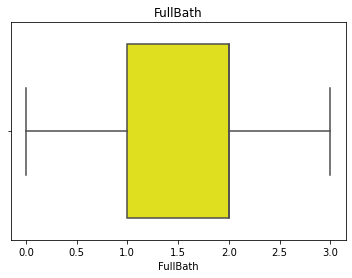

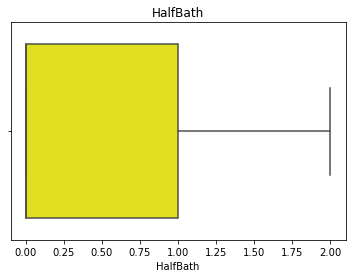

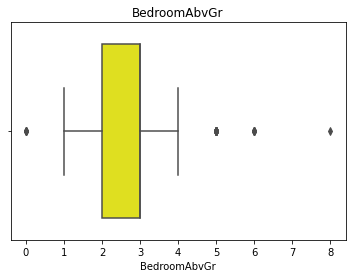

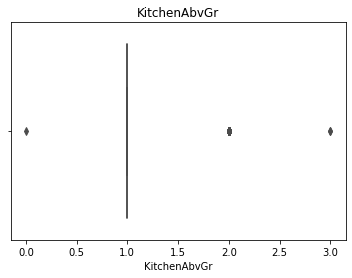

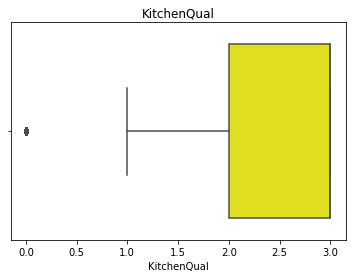

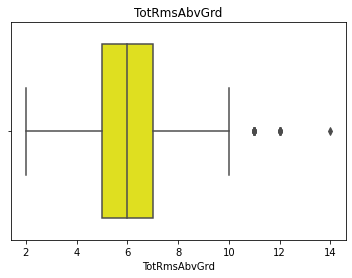

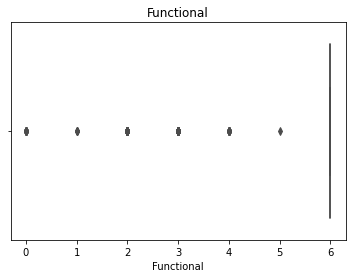

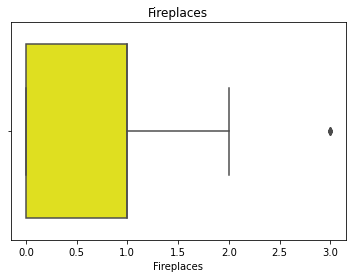

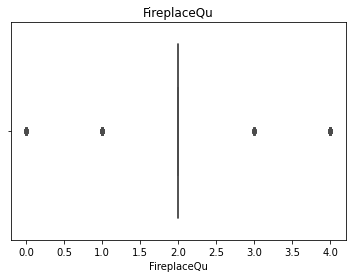

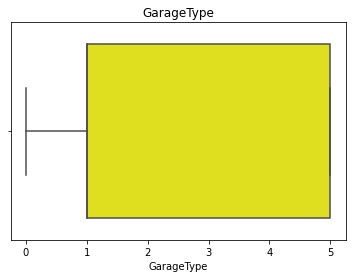

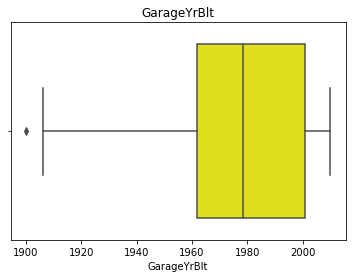

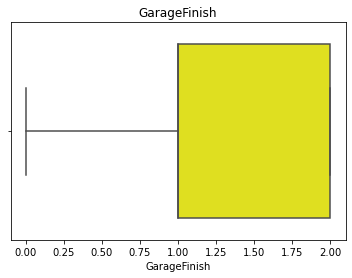

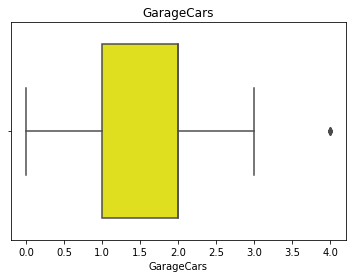

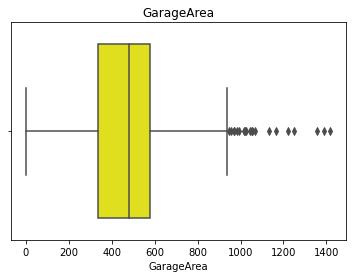

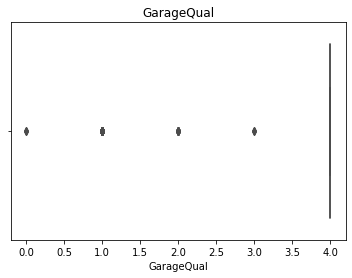

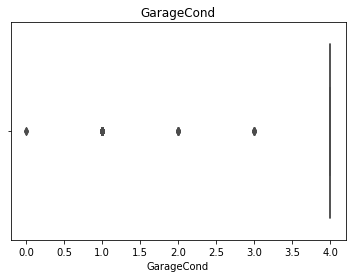

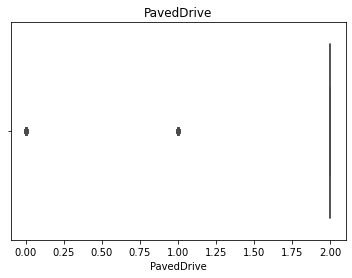

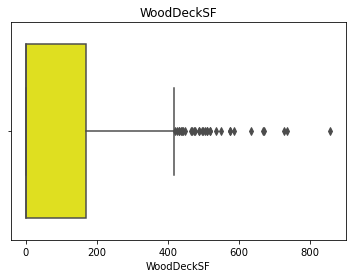

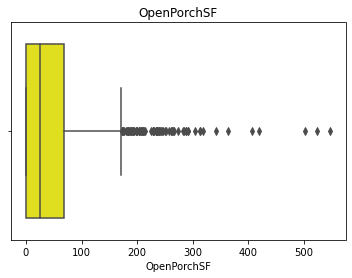

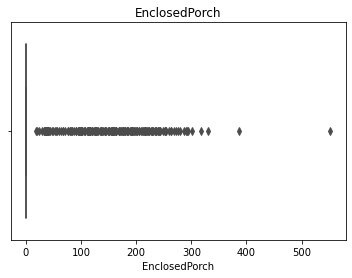

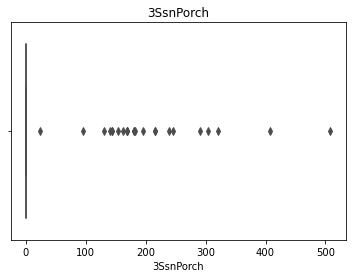

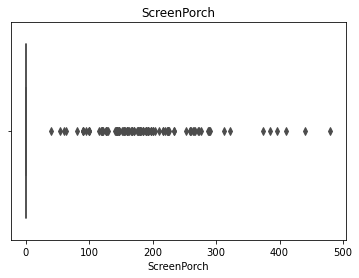

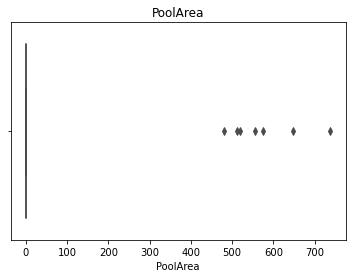

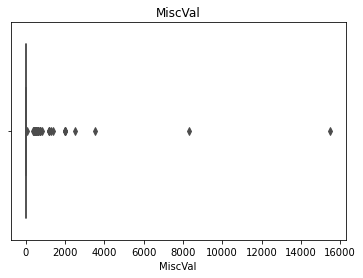

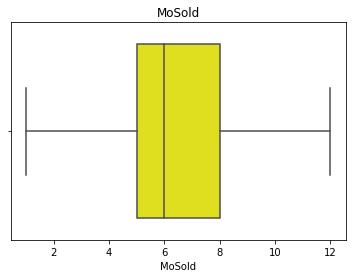

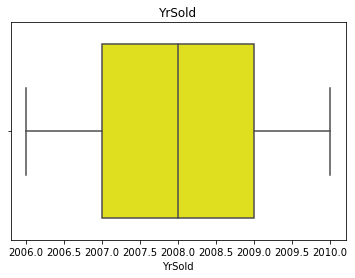

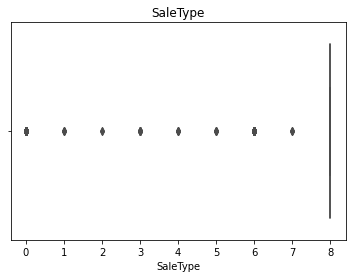

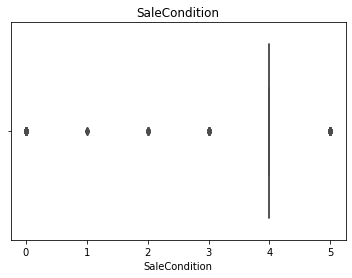

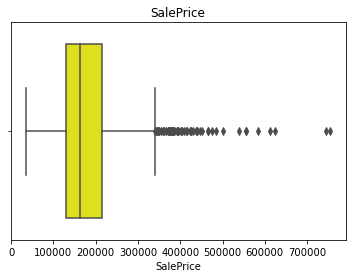

In [39]:
#Now seeing the outliers using boxplot as we remove  nan values from the column
for col in df.columns: 
    data=df.copy()
    sns.boxplot(data[col],color='yellow')
    #data[col].hist(bins=20)
    plt.title(col)
    plt.show()

There are Outliers present in most of the columns in the dataset

# Statistical Analysis

In [40]:
df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,70.049958,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,0.632017,22.024023,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,50.000000,3.000000,70.049958,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,70.000000,3.000000,79.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


<AxesSubplot:>

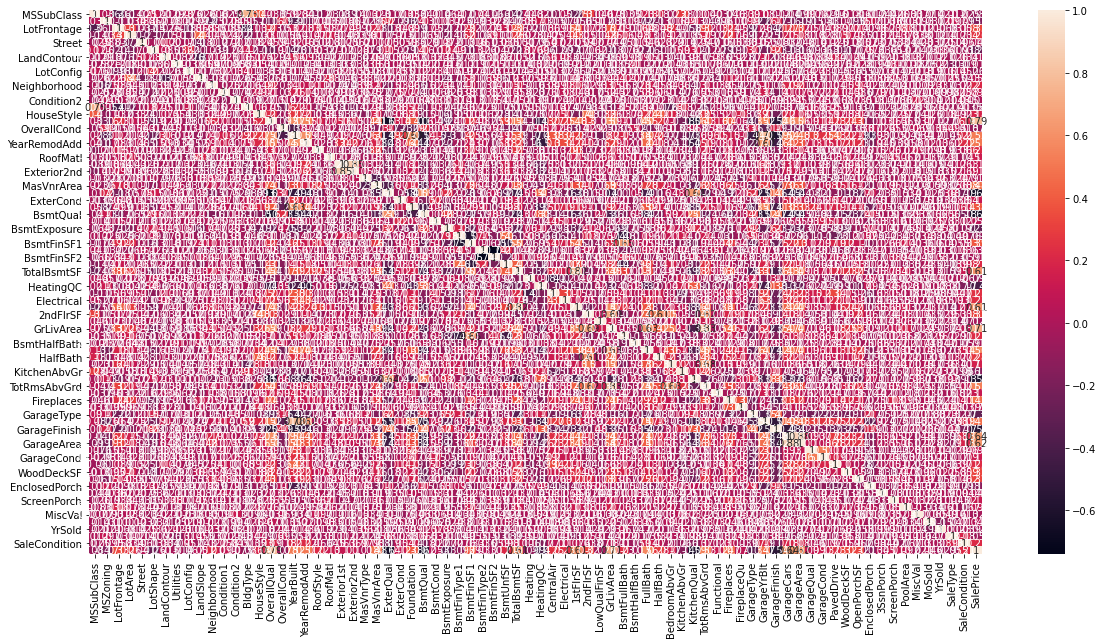

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [42]:
df.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.035900,-0.357056,-0.139781,-0.024969,0.119289,-0.002940,-2.284384e-02,0.075910,-0.025672,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,0.035900,1.000000,-0.106363,-0.034452,0.087654,0.061887,-0.017854,-1.192034e-03,-0.009895,-0.022055,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.357056,-0.106363,1.000000,0.306795,-0.037323,-0.144931,-0.075647,5.171411e-18,-0.181253,0.067608,...,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,-0.030846,0.058464,0.334901
LotArea,-0.139781,-0.034452,0.306795,1.000000,-0.197131,-0.165315,-0.149083,1.012318e-02,-0.121161,0.436868,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,-0.024969,0.087654,-0.037323,-0.197131,1.000000,-0.010224,0.115995,1.681767e-03,0.013960,-0.179360,...,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.013585,-0.031496,0.010158,0.001205,0.003690,-0.033455,-0.011599,-5.155166e-02,0.018902,0.007072,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,-0.021407,-0.020628,0.006768,-0.014261,-0.025043,0.036449,0.020507,2.335254e-02,-0.005992,-0.002305,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.012464,0.097437,-0.030846,0.012292,0.014339,-0.000911,-0.025754,-1.267697e-01,0.014325,0.054858,...,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.024940,0.009494,0.058464,0.034169,0.006064,-0.038118,0.033809,-8.970068e-02,0.051579,-0.043095,...,-0.098388,0.004379,-0.020095,-0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


In [43]:
#checking th skewness of the dataset
df.skew()

MSSubClass        1.407657
MSZoning         -1.735395
LotFrontage       2.384950
LotArea          12.207688
Street          -15.518770
                   ...    
MoSold            0.212053
YrSold            0.096269
SaleType         -3.868638
SaleCondition    -2.741167
SalePrice         1.882876
Length: 76, dtype: float64

# Removing outliers and skewness from the dataset

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(z)

[[0.07337496 0.04553194 0.22937175 ... 0.31386709 0.2085023  0.34727322]
 [0.87256276 0.04553194 0.4519361  ... 0.31386709 0.2085023  0.00728832]
 [0.07337496 0.04553194 0.09311018 ... 0.31386709 0.2085023  0.53615372]
 ...
 [0.30985939 0.04553194 0.18395123 ... 0.31386709 0.2085023  1.07761115]
 [0.87256276 0.04553194 0.09311018 ... 0.31386709 0.2085023  0.48852299]
 [0.87256276 0.04553194 0.22483348 ... 0.31386709 0.2085023  0.42084081]]


In [45]:
threhold=3

In [46]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([   1,    3,    3, ..., 1458, 1458, 1459], dtype=int64), array([46, 66, 74, ..., 34, 40, 64], dtype=int64))


In [47]:
z[3][66] #checking the above output result 

4.092523739317571

In [48]:
df_new=df[(z<3).all(axis=1)]  #removing outliers

In [49]:
print("Shape of the dataset before removing outliers",df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",df_new.shape)

Shape of the dataset before removing outliers (1460, 76)

 

Shape of the dataset after removing the outliers (608, 76)


In [50]:
#after removing dataset we are left with 1028 rows

In [51]:
df_new.skew()

MSSubClass       1.266144
MSZoning         2.310849
LotFrontage     -0.023120
LotArea          0.463401
Street           0.000000
                   ...   
MoSold           0.236865
YrSold           0.087826
SaleType        -3.387950
SaleCondition    1.640945
SalePrice        0.812608
Length: 76, dtype: float64

In [52]:
#removing the Skewness
colllist=df_new.columns.values
for i in range(0,len(colllist)):
    if df_new.skew().loc[colllist[i]]>0.55:
        df_new[colllist[i]]=np.sqrt(df_new[colllist[i]])

In [53]:
df_new.skew()

MSSubClass       0.716083
MSZoning         2.182115
LotFrontage     -0.023120
LotArea          0.463401
Street           0.000000
                   ...   
MoSold           0.236865
YrSold           0.087826
SaleType        -3.387950
SaleCondition    1.338025
SalePrice        0.403205
Length: 76, dtype: float64

# Splitting the data into training and testing sets

In [54]:
y=df_new['SalePrice']

In [55]:
df_new.drop(['SalePrice'],axis=1,inplace=True)

In [56]:
x=df_new.iloc[:,:]

In [57]:
#Scaling the data in x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_x=sc.fit_transform(x)


# Model Building

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import RandomizedSearchCV

In [59]:
#Finding the best Random state

max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lm=LinearRegression() 
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    pred=lm.predict(x_test)
    r_score=r2_score(y_test,pred)

    if r_score > max_score:
        max_score=r_score
        final_rstate=i
print("The maximum r2_score is ",max_score, "at random state",final_rstate) 

The maximum r2_score is  0.951306308827859 at random state 62


In [60]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=62)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(486, 75) (122, 75) (486,) (122,)


In [61]:
#using Lasso, Ridge And Elastic net to overcome overfit and underfit situation

In [62]:
from sklearn.linear_model import Lasso,Ridge

ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print("Lasso",ls.score(x_train,y_train))
print("\n")
preed=ls.predict(x_test)
r_score=r2_score(y_test,preed)
print("The R2 score is",r_score)
print("\n")


ri=Ridge(alpha=0.001)
ri.fit(x_train,y_train)
print("Ridge",ri.score(x_train,y_train))
print("\n")
predd=ri.predict(x_test)
r_score=r2_score(y_test,predd)
print("The r2_score is",r_score)
print("\n")


from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
r_score=r2_score(y_test,enrpred)
print("The r2_score is",r_score)

Lasso 0.9283968456933108


The R2 score is 0.9513116578891683


Ridge 0.9283968474895185


The r2_score is 0.9513089571021621


0.903923897554858
The r2_score is 0.943860325561731


In [78]:
#best parameter for SVC
svr=SVR()
parameters={'kernel':('linear','poly','rbf')}
gd=RandomizedSearchCV(svr,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'kernel': 'linear'}

In [67]:
#best parameter for KNN
knr=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gd=RandomizedSearchCV(knr,parameters)
gd.fit(x_train,y_train)
gd.best_params_


{'n_neighbors': 10}

In [64]:
#best parameter for DTR
dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=RandomizedSearchCV(dtr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'mse'}

In [69]:
Model= []
score= []
model=[LinearRegression(),SVR(kernel='linear'),DecisionTreeRegressor(criterion='mse'),KNeighborsRegressor(n_neighbors=10)]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    R2_score=r2_score(y_test,prediction)
    print("R2_SCORE =",R2_score)
    score.append(R2_score*100)
    print("\n")
    
    

    



LinearRegression()


R2_SCORE = 0.951306308827859




SVR(kernel='linear')


R2_SCORE = 0.888777598331424




DecisionTreeRegressor()


R2_SCORE = 0.7377830727337529




KNeighborsRegressor(n_neighbors=10)


R2_SCORE = 0.7391963320303527




In [72]:
outcome=pd.DataFrame({'Model':['LinearRegression','DecisionTreeRegressor','SVR','KNeighborsRegressor'],'R2_Score':[0.95,0.74,0.89,0.74]})
outcome

,Model,R2_Score
0,LinearRegression,0.95
1,DecisionTreeRegressor,0.74
2,SVR,0.89
3,KNeighborsRegressor,0.74


In [73]:
#Linear Regresor is giving Good result hence finalizing it

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr=GradientBoostingRegressor(n_estimators=500,max_depth= 4 ,min_samples_split= 5,learning_rate=0.1,loss='ls')
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
gbrpred=gbr.predict(x_test)
R2_score=r2_score(gbrpred,y_test)
print("R2 Score =", R2_score)

0.9999356972340294
R2 Score = 0.9400837008690525


In [75]:
print("ERROR")


print("MEan Absolute error:",mean_absolute_error(y_test,gbrpred))
print("Mean squared error:",mean_absolute_error(y_test,gbrpred))

print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,gbrpred)))

ERROR
MEan Absolute error: 12.58049455351138
Mean squared error: 12.58049455351138
Root mean squared error: 16.738419733188664


In [76]:
lm=LinearRegression() 
lm.fit(x_train,y_train)
print(lm.score(x_train,y_train))
lm_pred=lm.predict(x_test)
r_score=r2_score(y_test,lm_pred)
print("R2 Score =", r_score)

0.9283968486183701
R2 Score = 0.951306308827859


In [77]:
print("ERROR")


print("MEan Absolute error:",mean_absolute_error(y_test,lm_pred))
print("Mean squared error:",mean_absolute_error(y_test,lm_pred))

print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,lm_pred)))

ERROR
MEan Absolute error: 11.592060835365748
Mean squared error: 11.592060835365748
Root mean squared error: 15.101605322312372
